In [1]:
import sys
sys.path.append("./Python Code")

from Stocks import Stocks
from Learner import Learner
from Market import Market

%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
%pylab inline

import datetime
import pandas_datareader.data as web
import pandas as pd

pd.set_option('display.precision', 2)

start_time = datetime.datetime(2006,3,21)
end_time = datetime.datetime(2017,4,28)

ticker = 'GOOG'

stock_data = web.DataReader(ticker, 'yahoo', start_time, end_time)

stock_data.head()

Populating the interactive namespace from numpy and matplotlib


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-03-21,350.01,351.66,339.08,339.92,19735800,169.79
2006-03-22,339.75,344.10,337.50,340.22,15248800,169.94
2006-03-23,342.35,345.75,340.20,341.89,14925000,170.77
2006-03-24,368.62,370.09,362.51,365.80,30474900,182.72
2006-03-27,367.09,371.71,365.00,369.69,14100000,184.66


In [3]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.1fM' %(x/1e6)

formatter = FuncFormatter(millions)

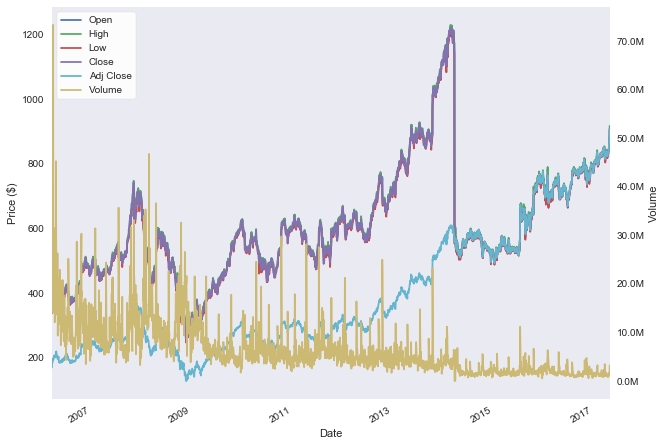

In [4]:
ax = stock_data.plot(secondary_y='Volume', figsize=(10,8))

ax.set_ylabel('Price ($)')
ax.right_ax.set_ylabel('Volume')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax.right_ax.get_legend_handles_labels()
ax.legend(lines+lines2, labels+labels2, frameon=True, framealpha=0.9, facecolor='white', loc=2)

ax.right_ax.yaxis.set_major_formatter(formatter)
ax.right_ax.grid(False)

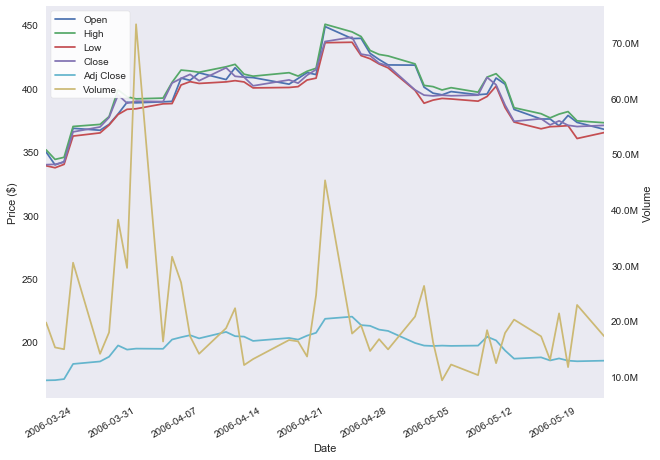

In [5]:
ax = stock_data.head(44).plot(secondary_y='Volume', figsize=(10,8))

ax.set_ylabel('Price ($)')
ax.right_ax.set_ylabel('Volume')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax.right_ax.get_legend_handles_labels()
ax.legend(lines+lines2, labels+labels2, frameon=True, framealpha=0.9, facecolor='white', loc=2)

ax.right_ax.yaxis.set_major_formatter(formatter)
ax.right_ax.grid(False)

In [61]:
tickers = ['SPY', 'GOOG', 'EBAY', 'IBM']

stocks = Stocks(start_time, end_time, tickers)

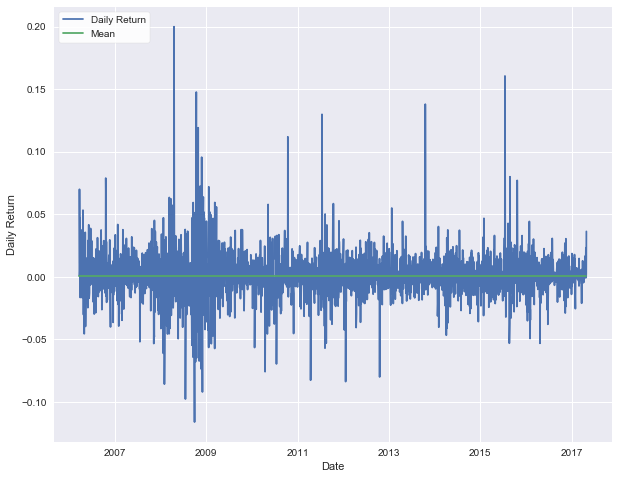

In [56]:
fig, ax = plt.subplots(figsize=(10,8))

ticker = 'GOOG'

ax.plot(stocks.data[ticker]['Daily Return'])

x = (start_time, end_time)
y = (stocks.data[ticker]['Daily Return'].mean(), stocks.data[ticker]['Daily Return'].mean())
ax.plot(x,y)

ax.set_xlabel('Date')
ax.set_ylabel('Daily Return')

ax.legend(['Daily Return', 'Mean'], frameon=True, framealpha=0.9, facecolor='white', loc=2)

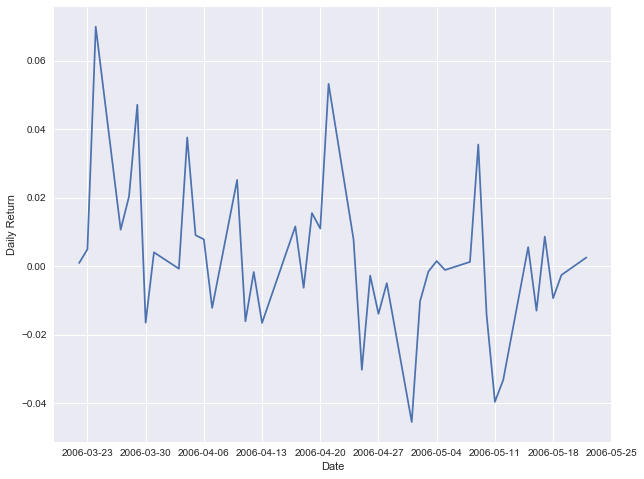

In [57]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(stocks.data[ticker]['Daily Return'].head(44))

ax.set_xlabel('Date')
ax.set_ylabel('Daily Return')

In [58]:
print([ticker + ' mean: ' + str(stocks.data[ticker]['Daily Return'].mean())])
print([ticker + ' std: ' + str(stocks.data[ticker]['Daily Return'].std())])

['GOOG mean: 0.000769252897215']
['GOOG std: 0.0185502701384']


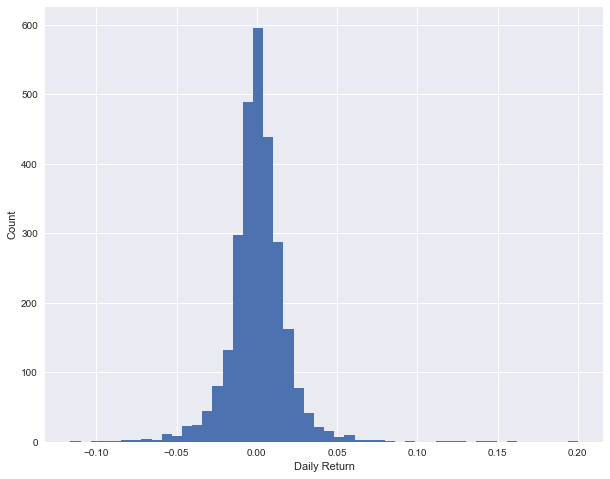

In [59]:
ax = stocks.data[ticker]['Daily Return'].hist(figsize=(10,8), bins=50)

ax.set_xlabel('Daily Return')
ax.set_ylabel('Count')


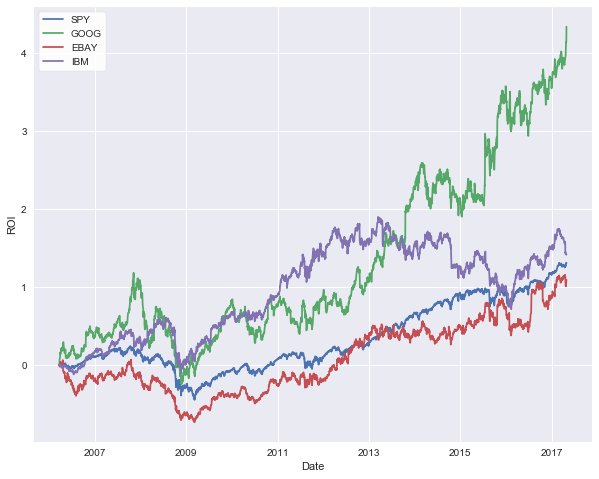

In [62]:
fig, ax = plt.subplots(figsize=(10,8))

for ticker in tickers:
    ax.plot(stocks.data[ticker]['Adj Close']/stocks.data[ticker]['Adj Close'][0] - 1)

ax.set_ylabel('ROI')
ax.set_xlabel('Date')

ax.legend(tickers, frameon=True, framealpha=0.9, facecolor='white', loc=2)